In [14]:
#log_m1_2.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV file from local system
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file (replace 'your_file.csv' with actual file name)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()  # Clean column names
df["model"] = df["model"].str.replace('_', '')
df.head()





Saving log_m1_2.csv to log_m1_2 (2).csv


,unixtime,model,count,speed,prediction_time
0,1739660256,deep40,49,1,0.187181
1,1739660261,shallow40,99,2,0.092217
2,1739660266,shallow40,149,2,0.060740
3,1739660271,shallow40,199,2,0.055834
4,1739660276,shallow40,249,2,0.064782


In [15]:
# Analyze speed 1, 2, 3, 4 frequency
speed_analysis = df["speed"].value_counts().sort_index()
print("\nSpeed 1-4 Frequency Analysis:")
print(speed_analysis)


Speed 1-4 Frequency Analysis:
speed
1    92
2    93
3    87
4    98
Name: count, dtype: int64


In [19]:
df.describe()

,unixtime,count,speed,prediction_time
count,3.700000e+02,370.000000,370.000000,370.000000
mean,1.739661e+09,4649.000000,2.516216,0.087694
std,5.441215e+02,2673.821702,1.131470,0.029100
min,1.739660e+09,49.000000,1.000000,0.049276
25%,1.739661e+09,2349.000000,2.000000,0.066816
50%,1.739661e+09,4649.000000,2.500000,0.079862
75%,1.739662e+09,6949.000000,4.000000,0.102729
max,1.739662e+09,9249.000000,4.000000,0.226229


In [20]:
#df.drop(df.index[:4], inplace=True)
df

,unixtime,model,count,speed,prediction_time
0,1739660256,deep40,49,1,0.187181
1,1739660261,shallow40,99,2,0.092217
2,1739660266,shallow40,149,2,0.060740
3,1739660271,shallow40,199,2,0.055834
4,1739660276,shallow40,249,2,0.064782
...,...,...,...,...,...
365,1739662132,deep40,9049,1,0.103649
366,1739662137,deep40,9099,1,0.107412
367,1739662142,shallow40,9149,2,0.125582
368,1739662147,shallow40,9199,2,0.080676


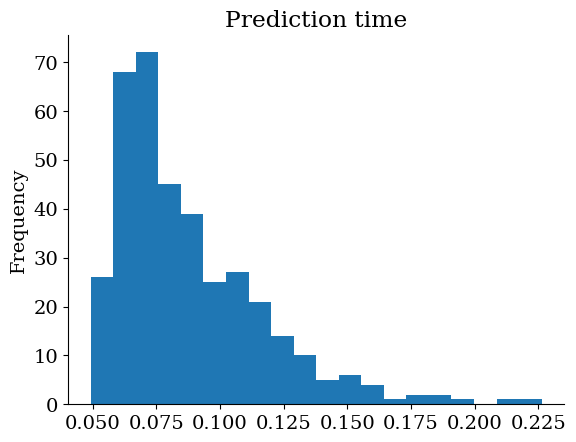

In [21]:
# @title loading_time

from matplotlib import pyplot as plt # Set plot style and font
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14
})

df['prediction_time'].plot(kind='hist', bins=20, title='Prediction time')
plt.gca().spines[['top', 'right',]].set_visible(False)

Model-wise Prediction Time Summary:
           count      mean       std       min       25%       50%       75%  \
model                                                                          
deep20      87.0  0.093267  0.035404  0.052798  0.065712  0.081274  0.117233   
deep40      92.0  0.094581  0.031635  0.049276  0.068767  0.085002  0.115443   
shallow20   98.0  0.080789  0.020509  0.051756  0.065723  0.077046  0.092672   
shallow40   93.0  0.082942  0.025319  0.052774  0.067227  0.079709  0.092678   

                max  
model                
deep20     0.226229  
deep40     0.187181  
shallow20  0.163403  
shallow40  0.212457  


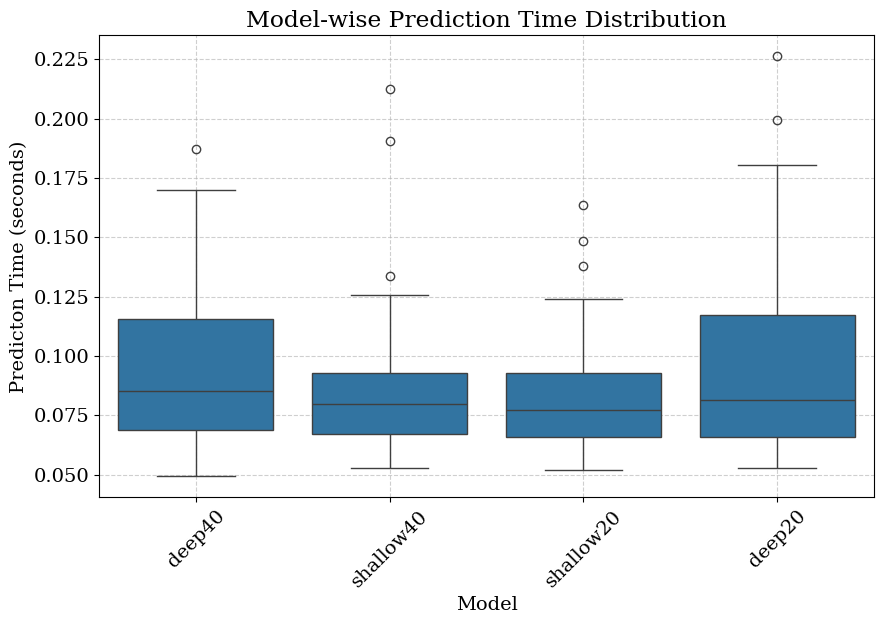

In [22]:

# Table: Model-wise Loading Time Summary
model_summary = df.groupby("model")["prediction_time"].describe()
print("Model-wise Prediction Time Summary:")
print(model_summary)

# Box Plot: Model-wise Loading Time
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="prediction_time", data=df)
plt.xticks(rotation=45)
plt.title("Model-wise Prediction Time Distribution")
plt.xlabel("Model")
plt.ylabel("Predicton Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("ondemand_prodiction_time.png", dpi=300, bbox_inches="tight")
plt.show()



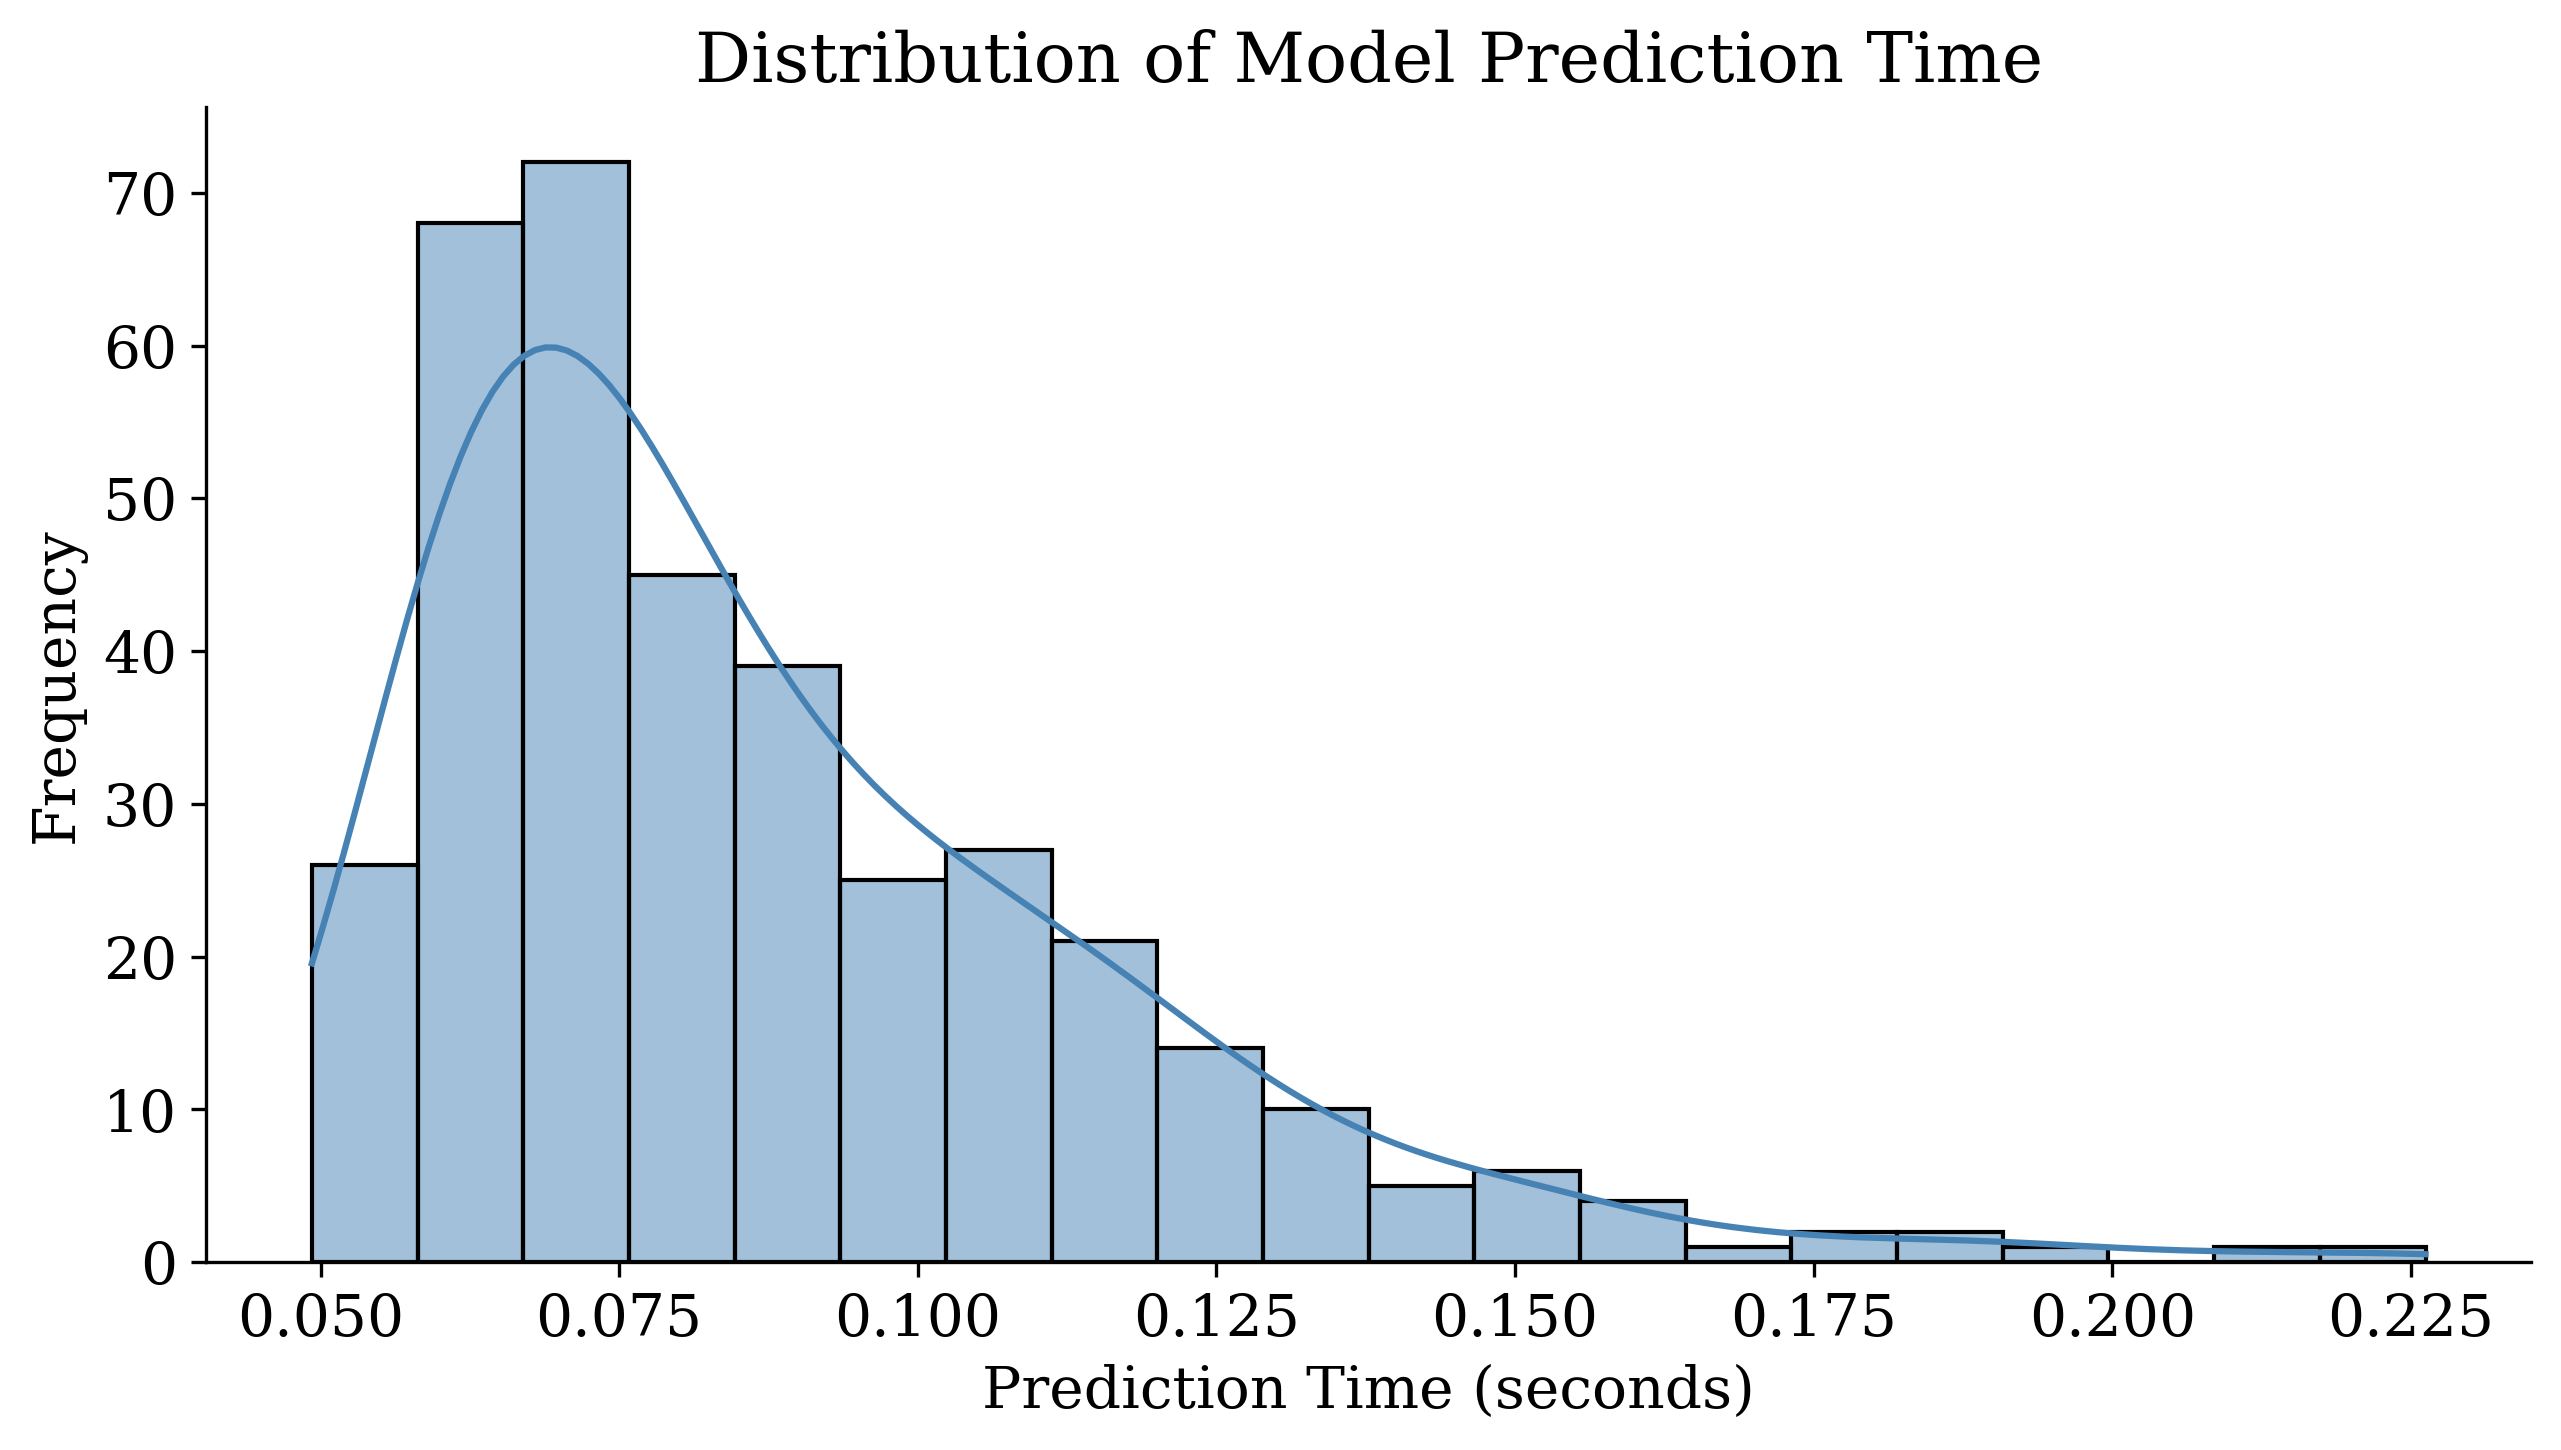

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and font
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14
})

# Create histogram with a darker blue color
plt.figure(figsize=(10, 5), dpi=300)  # High-resolution plot
sns.histplot(df["prediction_time"], bins=20, kde=True, color="steelblue")  # Darker color

# Customize plot
plt.xlabel("Prediction Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Model Prediction Time")

# Remove top and right spines for a clean look
sns.despine()

# Show plot
plt.show()



Model-wise Loading Time by Speed Summary:
                 count  mean  std  min  25%  50%  75%  max
model     speed                                           
deep20    3       29.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
deep40    1       32.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
shallow20 4       34.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
shallow40 2       27.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


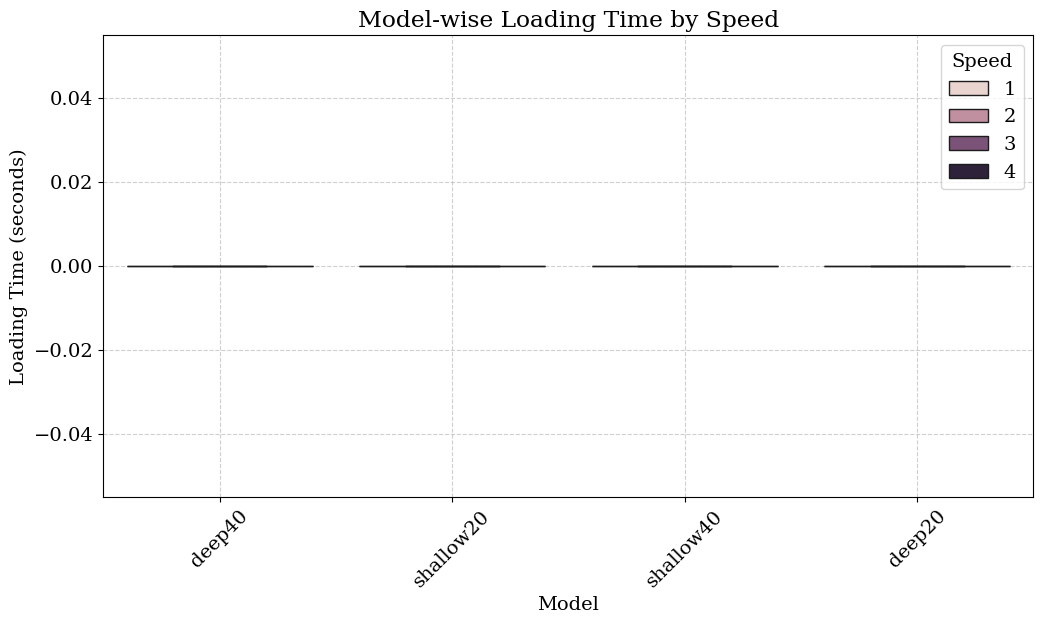

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Table: Model-wise Loading Time by Speed
model_speed_summary = df.groupby(["model", "speed"]) ["loading_time"].describe()
print("\nModel-wise Loading Time by Speed Summary:")
print(model_speed_summary)

# Box Plot: Model-wise Loading Time by Speed
plt.figure(figsize=(12, 6))
sns.boxplot(x="model", y="loading_time", hue="speed", data=df)
plt.xticks(rotation=45)
plt.title("Model-wise Loading Time by Speed")
plt.xlabel("Model")
plt.ylabel("Loading Time (seconds)")
plt.legend(title="Speed")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("model_speed_loading_time.png", dpi=300, bbox_inches="tight")
plt.show()

# Download the generated plots
from google.colab import files
files.download("model_loading_time2.png")
files.download("model_speed_loading_time2.png")